In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load all datasets except reviews
customer = pd.read_csv('Dataset\olist_customers_dataset.csv')
geolocation = pd.read_csv('Dataset\olist_geolocation_dataset.csv')
order_items = pd.read_csv('Dataset\olist_order_items_dataset.csv')
order_payments = pd.read_csv('Dataset\olist_order_payments_dataset.csv')
orders = pd.read_csv('Dataset\olist_orders_dataset.csv')
products = pd.read_csv('Dataset\olist_products_dataset.csv')
sellers = pd.read_csv('Dataset\olist_sellers_dataset.csv')
category_name_translation = pd.read_csv('Dataset\product_category_name_translation.csv')

In [3]:
products = pd.merge(products, category_name_translation, on='product_category_name', how='left')
products.drop(columns=['product_category_name'], inplace=True)
products.head(5)

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [4]:
raw = orders.merge(order_items, on='order_id', how='left')
raw = raw.merge(order_payments, on='order_id', how='outer', validate='m:m')
raw = raw.merge(products, on='product_id', how='outer')
raw = raw.merge(customer, on='customer_id', how='outer')
raw = raw.merge(geolocation, left_on = 'customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='outer')
raw = raw.merge(sellers, on='seller_id', how='outer')

In [6]:
raw.shape

(18111505, 38)

In [7]:
def resumetable(df):
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values
    summary['Missing Percentage'] = summary['Missing']/df.shape[0]     
    summary['Uniques'] = df.nunique().values

    return summary

def cross_heatmap(df, cols, normalize=False, values=None, aggfunc=None):
    temp = cols
    cm = sns.light_palette("green", as_cmap=True)
    return pd.crosstab(df[temp[0]], df[temp[1]], 
                       normalize=normalize, values=values, aggfunc=aggfunc).style.background_gradient(cmap = cm)

In [8]:
resumetable(raw)

,Name,dtypes,Missing,Missing Percentage,Uniques
0,order_id,object,31864,0.001759,99441
1,customer_id,object,31864,0.001759,99441
2,order_status,object,31864,0.001759,8
3,order_purchase_timestamp,object,31864,0.001759,98875
4,order_approved_at,object,58950,0.003255,90733
5,order_delivered_carrier_date,object,347141,0.019167,81018
6,order_delivered_customer_date,object,523678,0.028914,95664
7,order_estimated_delivery_date,object,31864,0.001759,459
8,order_item_id,float64,155996,0.008613,21
9,product_id,object,155996,0.008613,32951


In [9]:
raw.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state', 'seller_zip_code_prefix',
       'seller_city', 'seller_state'],
      dtype='object')

In [27]:
raw.describe()

,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,seller_zip_code_prefix
count,1.795551e+07,1.795551e+07,1.795551e+07,1.807861e+07,1.807861e+07,1.807861e+07,1.769603e+07,1.769603e+07,1.769603e+07,1.795183e+07,1.795183e+07,1.795183e+07,1.795183e+07,1.807964e+07,1.811119e+07,1.811119e+07,1.811119e+07,1.795551e+07
mean,1.205339e+00,1.215850e+02,1.961627e+01,1.093270e+00,2.933083e+00,1.745977e+02,4.865285e+01,7.799335e+02,2.194911e+00,2.152179e+03,3.047683e+01,1.671088e+01,2.314499e+01,3.269805e+04,3.272731e+04,-2.196180e+01,-4.594653e+01,2.510738e+04
std,7.000264e-01,1.865799e+02,1.497672e+01,6.878915e-01,2.794927e+00,2.678778e+02,1.007660e+01,6.474214e+02,1.719008e+00,3.842051e+03,1.643536e+01,1.349291e+01,1.177957e+01,2.696070e+04,2.697481e+04,4.288778e+00,3.563002e+00,2.800423e+04
min,1.000000e+00,8.500000e-01,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,4.000000e+00,1.000000e+00,0.000000e+00,7.000000e+00,2.000000e+00,6.000000e+00,1.003000e+03,1.001000e+03,-3.660537e+01,-1.014668e+02,1.001000e+03
25%,1.000000e+00,3.990000e+01,1.347000e+01,1.000000e+00,1.000000e+00,6.171000e+01,4.200000e+01,3.410000e+02,1.000000e+00,3.000000e+02,1.800000e+01,8.000000e+00,1.500000e+01,1.314000e+04,1.314000e+04,-2.357583e+01,-4.762090e+01,6.871000e+03
50%,1.000000e+00,7.499000e+01,1.625000e+01,1.000000e+00,1.000000e+00,1.100000e+02,5.100000e+01,5.970000e+02,1.000000e+00,7.000000e+02,2.500000e+01,1.300000e+01,2.000000e+01,2.359500e+04,2.389500e+04,-2.291094e+01,-4.645805e+01,1.392000e+04
75%,1.000000e+00,1.350000e+02,2.035000e+01,1.000000e+00,4.000000e+00,1.917300e+02,5.700000e+01,9.780000e+02,3.000000e+00,1.825000e+03,3.800000e+01,2.000000e+01,3.000000e+01,3.840000e+04,3.840000e+04,-2.043346e+01,-4.335166e+01,3.027000e+04
max,2.100000e+01,6.735000e+03,4.096800e+02,2.900000e+01,2.400000e+01,1.366408e+04,7.600000e+01,3.992000e+03,2.000000e+01,4.042500e+04,1.050000e+02,1.050000e+02,1.180000e+02,9.999000e+04,9.999000e+04,4.506593e+01,1.211054e+02,9.973000e+04


In [5]:
raw['order_purchase_timestamp'] = pd.to_datetime(raw['order_purchase_timestamp'])
raw['order_delivered_customer_date'] = pd.to_datetime(raw['order_delivered_customer_date'])

# Calculate the latest order date
latest_order_date = raw['order_purchase_timestamp'].max()
print("Latest order date: {}".format(latest_order_date))

Latest order date: 2018-10-17 17:30:18


In [6]:
latest_purchase_df = raw.groupby('customer_id')['order_purchase_timestamp'].max()
latest_purchase_df = latest_purchase_df.reset_index().rename(columns={'order_purchase_timestamp': 'latest_purchase_date'})
latest_purchase_df.head(5)

,customer_id,latest_purchase_date
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17


In [7]:
latest_purchase_df['days_since_last_purchase'] = (latest_order_date - latest_purchase_df['latest_purchase_date']).dt.days
latest_purchase_df.head(5)

,customer_id,latest_purchase_date,days_since_last_purchase
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,337
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,458
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,596
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,427
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,198


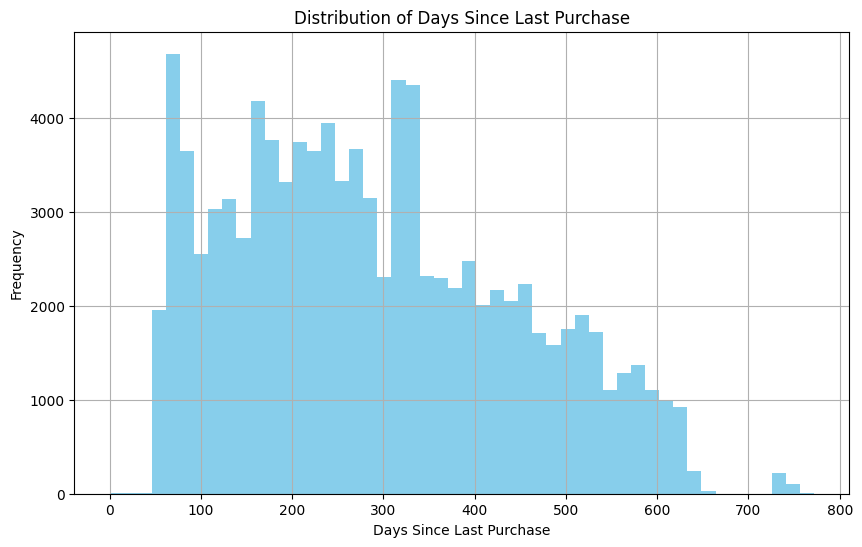

In [8]:
plt.figure(figsize=(10, 6))
plt.hist(latest_purchase_df['days_since_last_purchase'], bins=50, color='skyblue')
plt.title('Distribution of Days Since Last Purchase')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [10]:
bins = [-1, 29, 89, 179, 359, float('inf')]  
labels = ['0-30 days', '1-3 month', '3-6 months', '6 months-1 year', 'More than 1 year']

latest_purchase_df['purchase_interval'] = pd.cut(latest_purchase_df['days_since_last_purchase'], bins=bins, labels=labels)
grouped_customers = latest_purchase_df.groupby('purchase_interval').size().reset_index(name='customer_count')

print(grouped_customers)

  purchase_interval  customer_count
0         0-30 days               8
1         1-3 month            9521
2        3-6 months           18655
3   6 months-1 year           40394
4  More than 1 year           30863


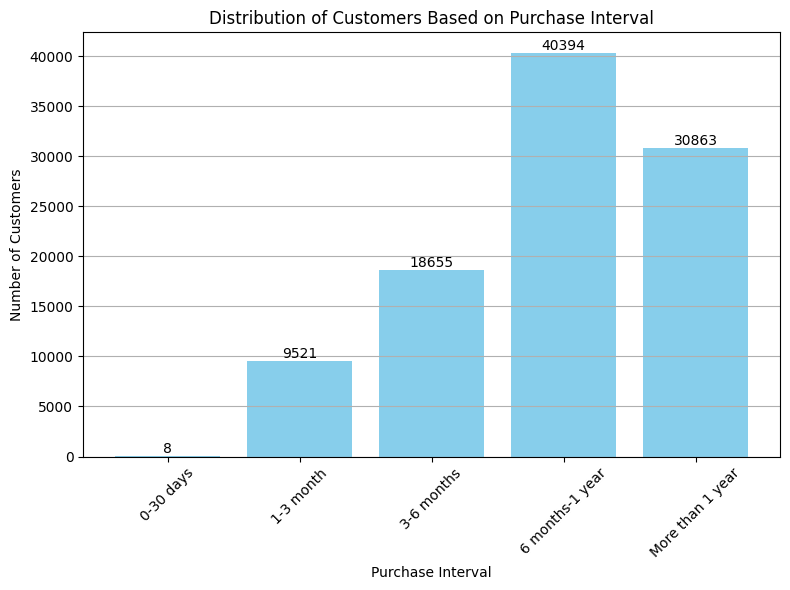

In [11]:
plt.figure(figsize=(8, 6))
bars = plt.bar(grouped_customers['purchase_interval'], grouped_customers['customer_count'], color='skyblue')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom', ha='center')
plt.title('Distribution of Customers Based on Purchase Interval')
plt.xlabel('Purchase Interval')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)  
plt.grid(axis='y') 
plt.tight_layout() 
plt.show()

In [12]:
merged_df = pd.merge(raw, latest_purchase_df, on='customer_id', how='left')
merged_df.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,seller_zip_code_prefix,seller_city,seller_state,latest_purchase_date,days_since_last_purchase,purchase_interval
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,-23.574809,-46.587471,sao paulo,SP,9350.0,maua,SP,2017-10-02 10:56:33,380.0,More than 1 year
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,-23.578333,-46.587123,sao paulo,SP,9350.0,maua,SP,2017-10-02 10:56:33,380.0,More than 1 year
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,-23.574809,-46.587471,sao paulo,SP,9350.0,maua,SP,2017-10-02 10:56:33,380.0,More than 1 year
3,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,-23.575033,-46.587451,sao paulo,SP,9350.0,maua,SP,2017-10-02 10:56:33,380.0,More than 1 year
4,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,-23.580054,-46.586673,sao paulo,SP,9350.0,maua,SP,2017-10-02 10:56:33,380.0,More than 1 year


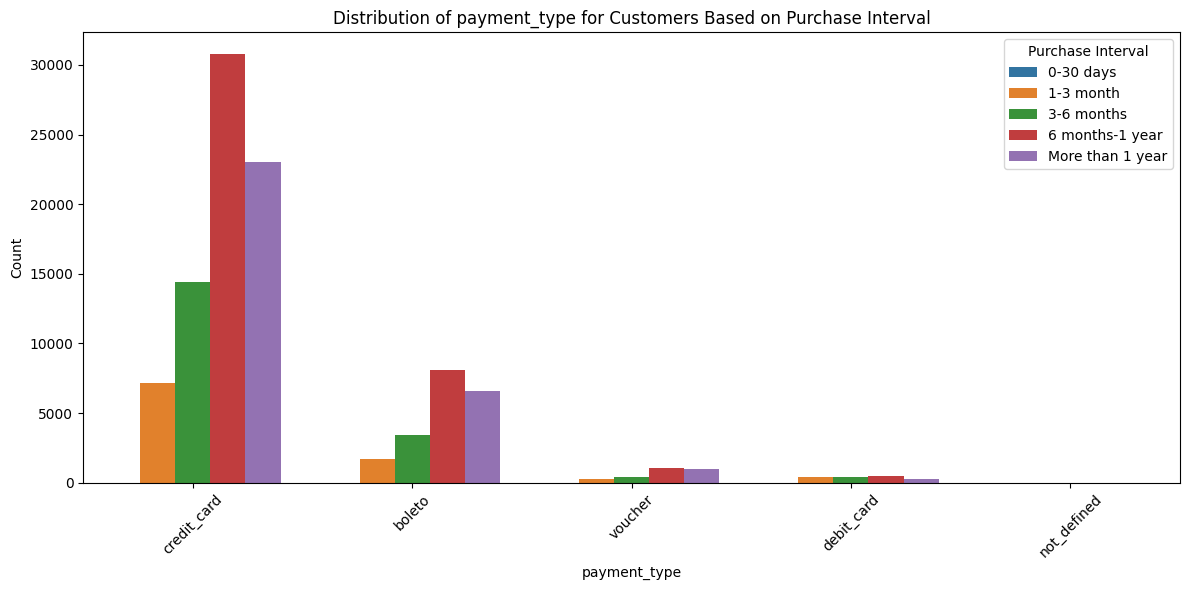

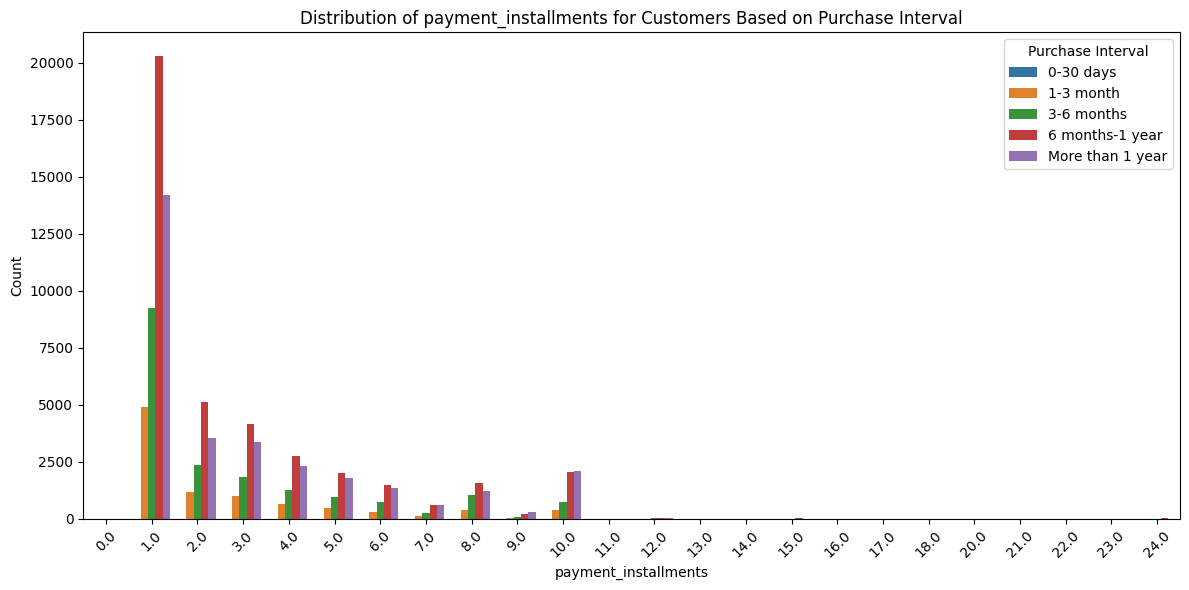

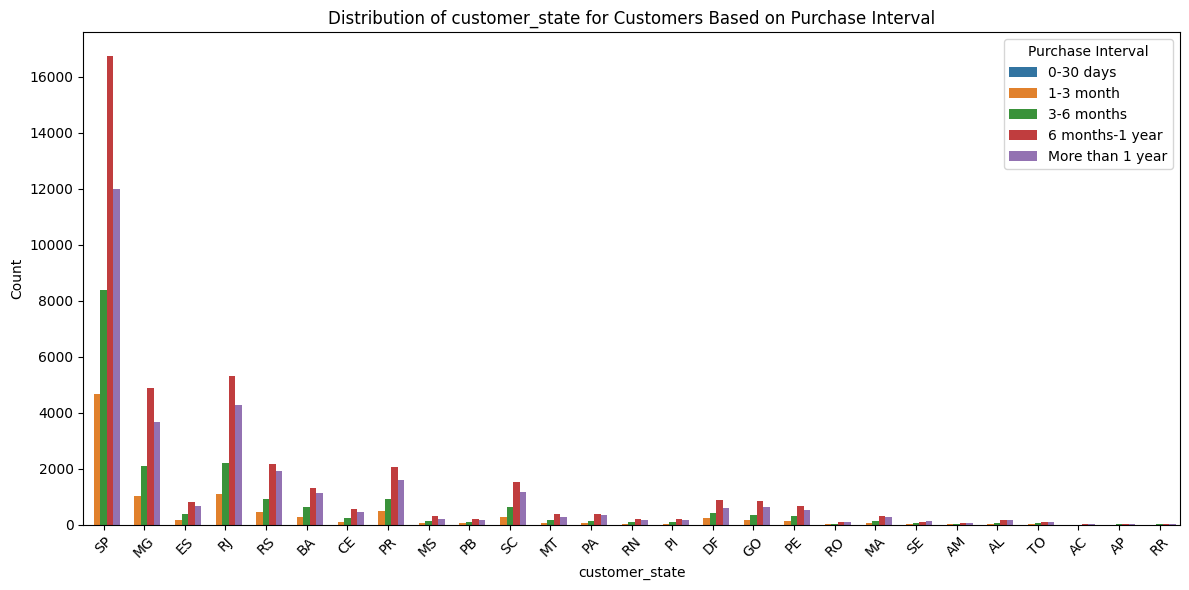

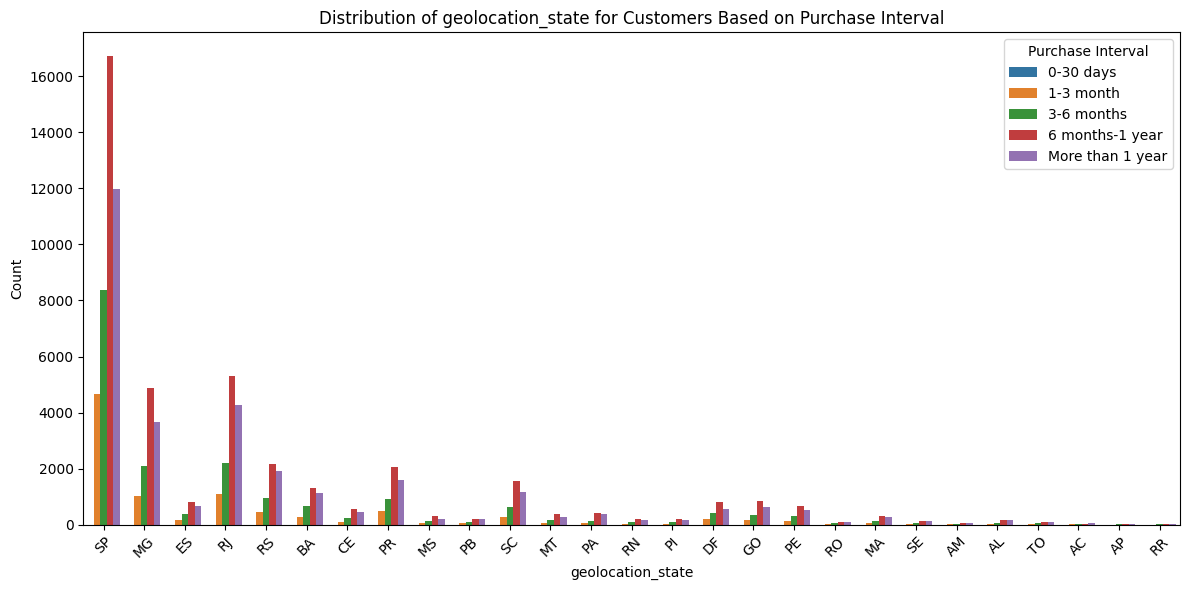

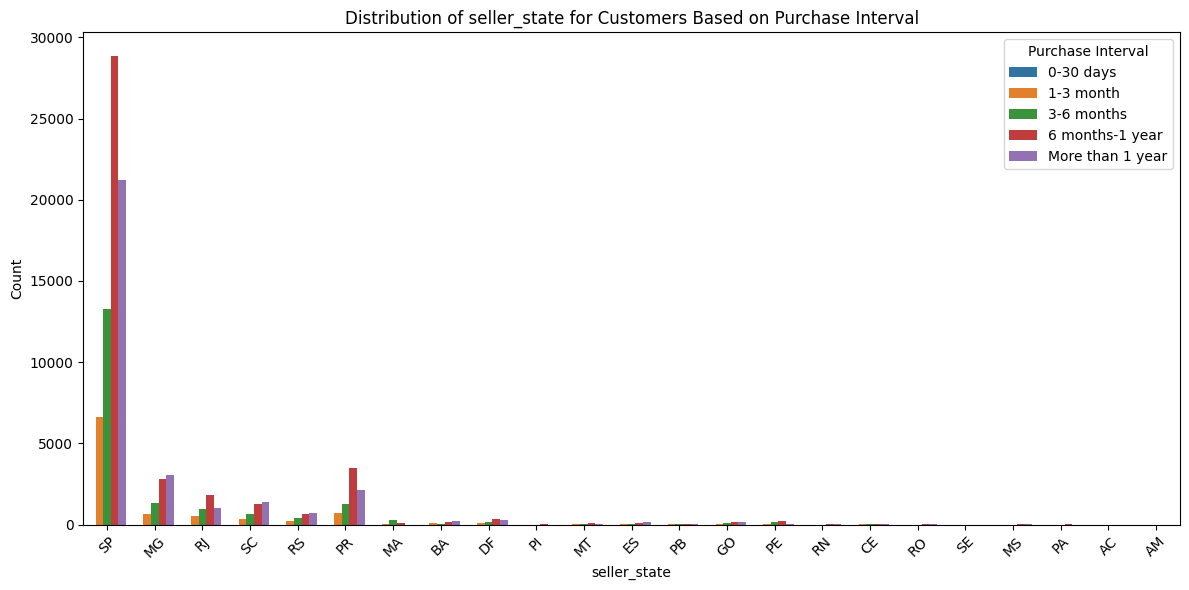

In [13]:
features = ['payment_type', 'payment_installments', 'customer_state', 'geolocation_state', 'seller_state']
for feature in features:
    grouped_data = merged_df.groupby(['customer_id', 'purchase_interval'])[feature].first().reset_index()
    
    plt.figure(figsize=(12, 6))
    sns.countplot(data=grouped_data, x=feature, hue='purchase_interval')
    plt.title(f'Distribution of {feature} for Customers Based on Purchase Interval')
    plt.xlabel(f'{feature}')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Purchase Interval', loc='upper right')
    plt.tight_layout()
    plt.show()

In [63]:
merged_df.groupby('purchase_interval')['payment_value'].describe()

,count,mean,std,min,25%,50%,75%,max
purchase_interval,,,,,,,,
0-30 days,1503.0,176.536813,51.413058,80.38,137.03,197.55,221.54,221.54
1-3 month,1705550.0,172.708613,244.216156,0.00,62.21,111.62,192.15,6922.21
3-6 months,3327117.0,185.187872,304.791995,0.01,63.68,115.02,198.20,7274.88
6 months-1 year,7396314.0,174.556779,252.982977,0.00,62.58,111.84,190.44,6081.54
More than 1 year,5647916.0,168.983357,270.271158,0.00,59.49,105.08,188.04,13664.08


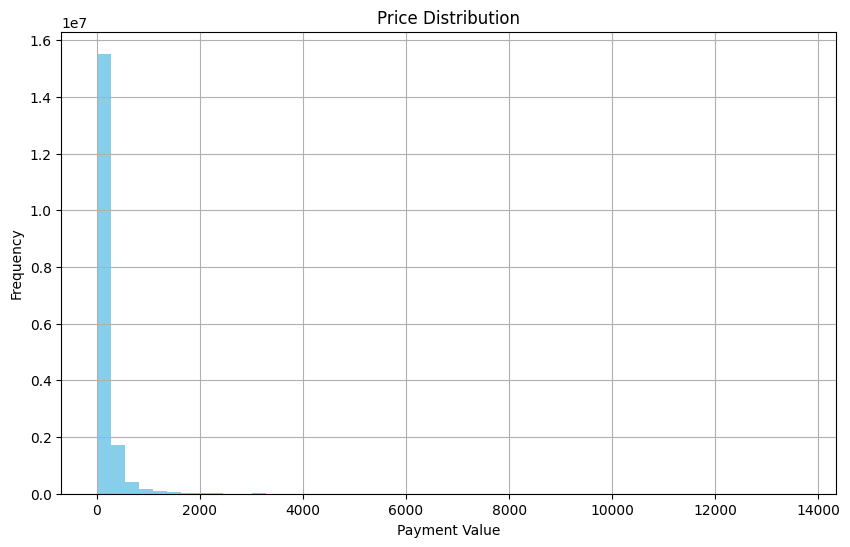

In [28]:
plt.figure(figsize=(10, 6))
plt.hist(merged_df['payment_value'], bins=50, color='skyblue')
plt.title('Price Distribution')
plt.xlabel('Payment Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Attributes to be analyzed: 'payment_value','product_category_name_english','seller_city', 'customer_city', etc.